# Analyze data distribution with CLUSTERING : K-means vs. Hierarchical Agglomerative Clustering (HAC) vs. DBSCAN

**Author: Pr Fabien MOUTARDE, Center for Robotics, MINES PARIS, PSL Université**

### Imports


In [4]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

### Loading toy datasets from files

In [5]:
# Get data
def get_data(data_path):
    data = []
    with open(data_path, 'r') as file:
        for num, line in enumerate(file):
            if num >= 4:
                line_sep = line.strip('\n').split(sep='\t')
                single_example = [float(element) for element in line_sep][1:]
                data.append(single_example)

    return np.array(data)

In [6]:
data_atom = get_data('./clustering-examples/Atom.lrn')
data_lsun = get_data('./clustering-examples/Lsun.lrn')
data_wingnut = get_data('./clustering-examples/WingNut.lrn')
data_chainlink = get_data('./clustering-examples/Chainlink.lrn')
data_twodiamonds = get_data('./clustering-examples/TwoDiamonds.lrn')

### Visualizing datasets

In [7]:
def data_show(data):
    num_dim = data.shape[1]
        
    # Show
    fig = plt.figure()
    if num_dim == 2:
        plt.scatter(data[:, 0], data[:, 1])
    else:
        ax = plt.axes(projection='3d')
        ax.scatter3D(data[:, 0], data[:, 1], data[:, 2])
    plt.show()

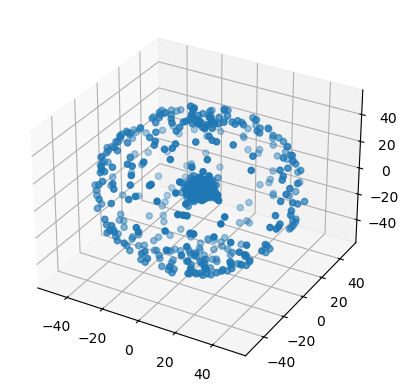

In [8]:
data_show(data_atom)

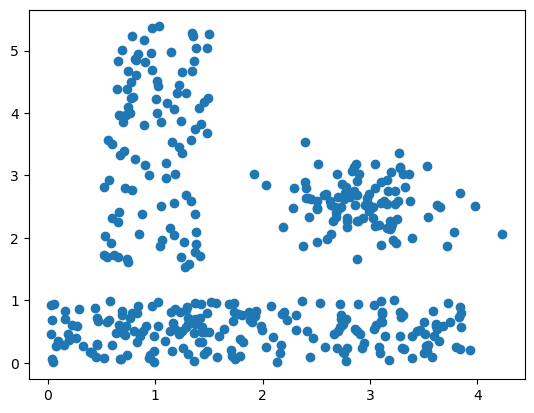

In [9]:
data_show(data_lsun)

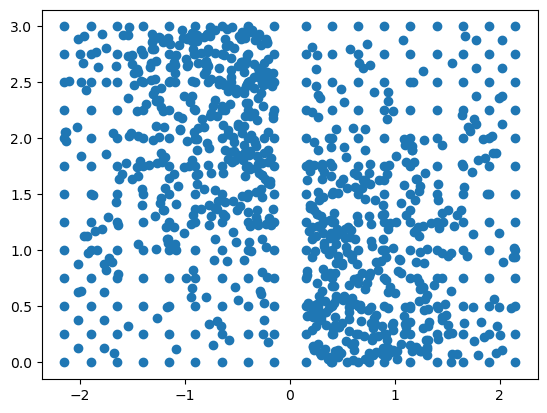

In [10]:
data_show(data_wingnut)

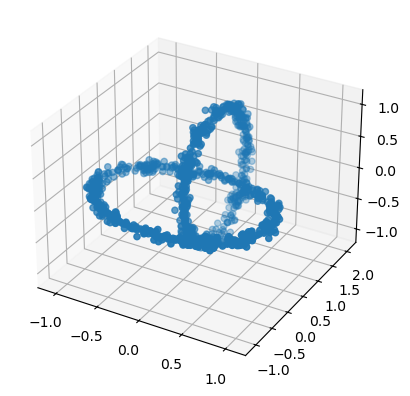

In [11]:
data_show(data_chainlink)

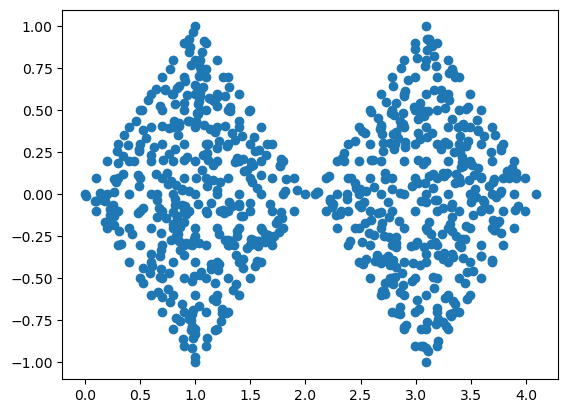

In [12]:
data_show(data_twodiamonds)

## 1. K-means

**Test the K-means clustering method, implemented in SciKit-Learn by the class sklearn.cluster.KMeans.**
**First read in detail its documentation:**
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

**Then experiment K-means on each of the 5 datasets, and with several values for K**

c:\Users\arman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\arman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[[1.04640014 3.95937904]
 [1.13132417 0.70493766]
 [3.06688924 1.71003656]]


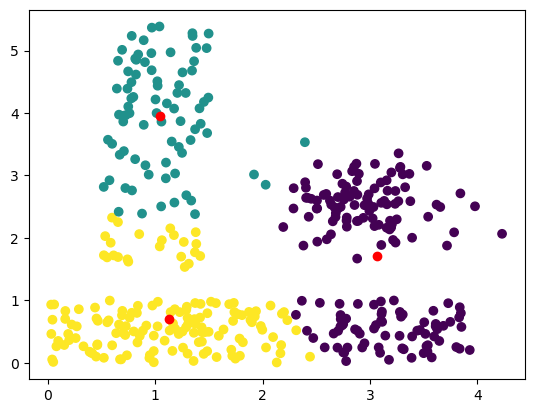

In [13]:
km = KMeans(n_clusters=3, init='k-means++', n_init='auto', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
cluster = km.fit(data_lsun)
centroid=cluster.cluster_centers_
print(centroid)
y_pred = cluster.fit_predict(data_lsun)
fig = plt.figure()
plt.scatter(data_lsun[:, 0], data_lsun[:, 1], c=y_pred)
plt.scatter(centroid[:, 0], centroid[:, 1], c = "r")
plt.show()

# Insert below the code to test Kmeans, with various values of K, on the 5 datasets


#### QUESTION 1: Does the K-means algo always produce the expected result?

No K-means result also depends on the initialization of the first centroids, which is a random choice among all the points of the dataset.

#### QUESTION 2: What is the only shape of cluster that K-means is capable of isolating?

The only shape of cluster that K-means is capable of isolating is spherical when it uses euclidian distance to measure similarity

## 2. Hierarchical Agglomerative Clustering

**Now, test the Hierarchical Agglomerative Clustering (HAC), implemented in SciKit-Learn by the class sklearn.cluster.AgglomerativeClustering**
**First read in detail its documentation:**
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

**Then experiment Agglomerative Clustering on each of the 5 datasets, with either single-linkage or complete-linkage, and with several values for the requested number of clusters**

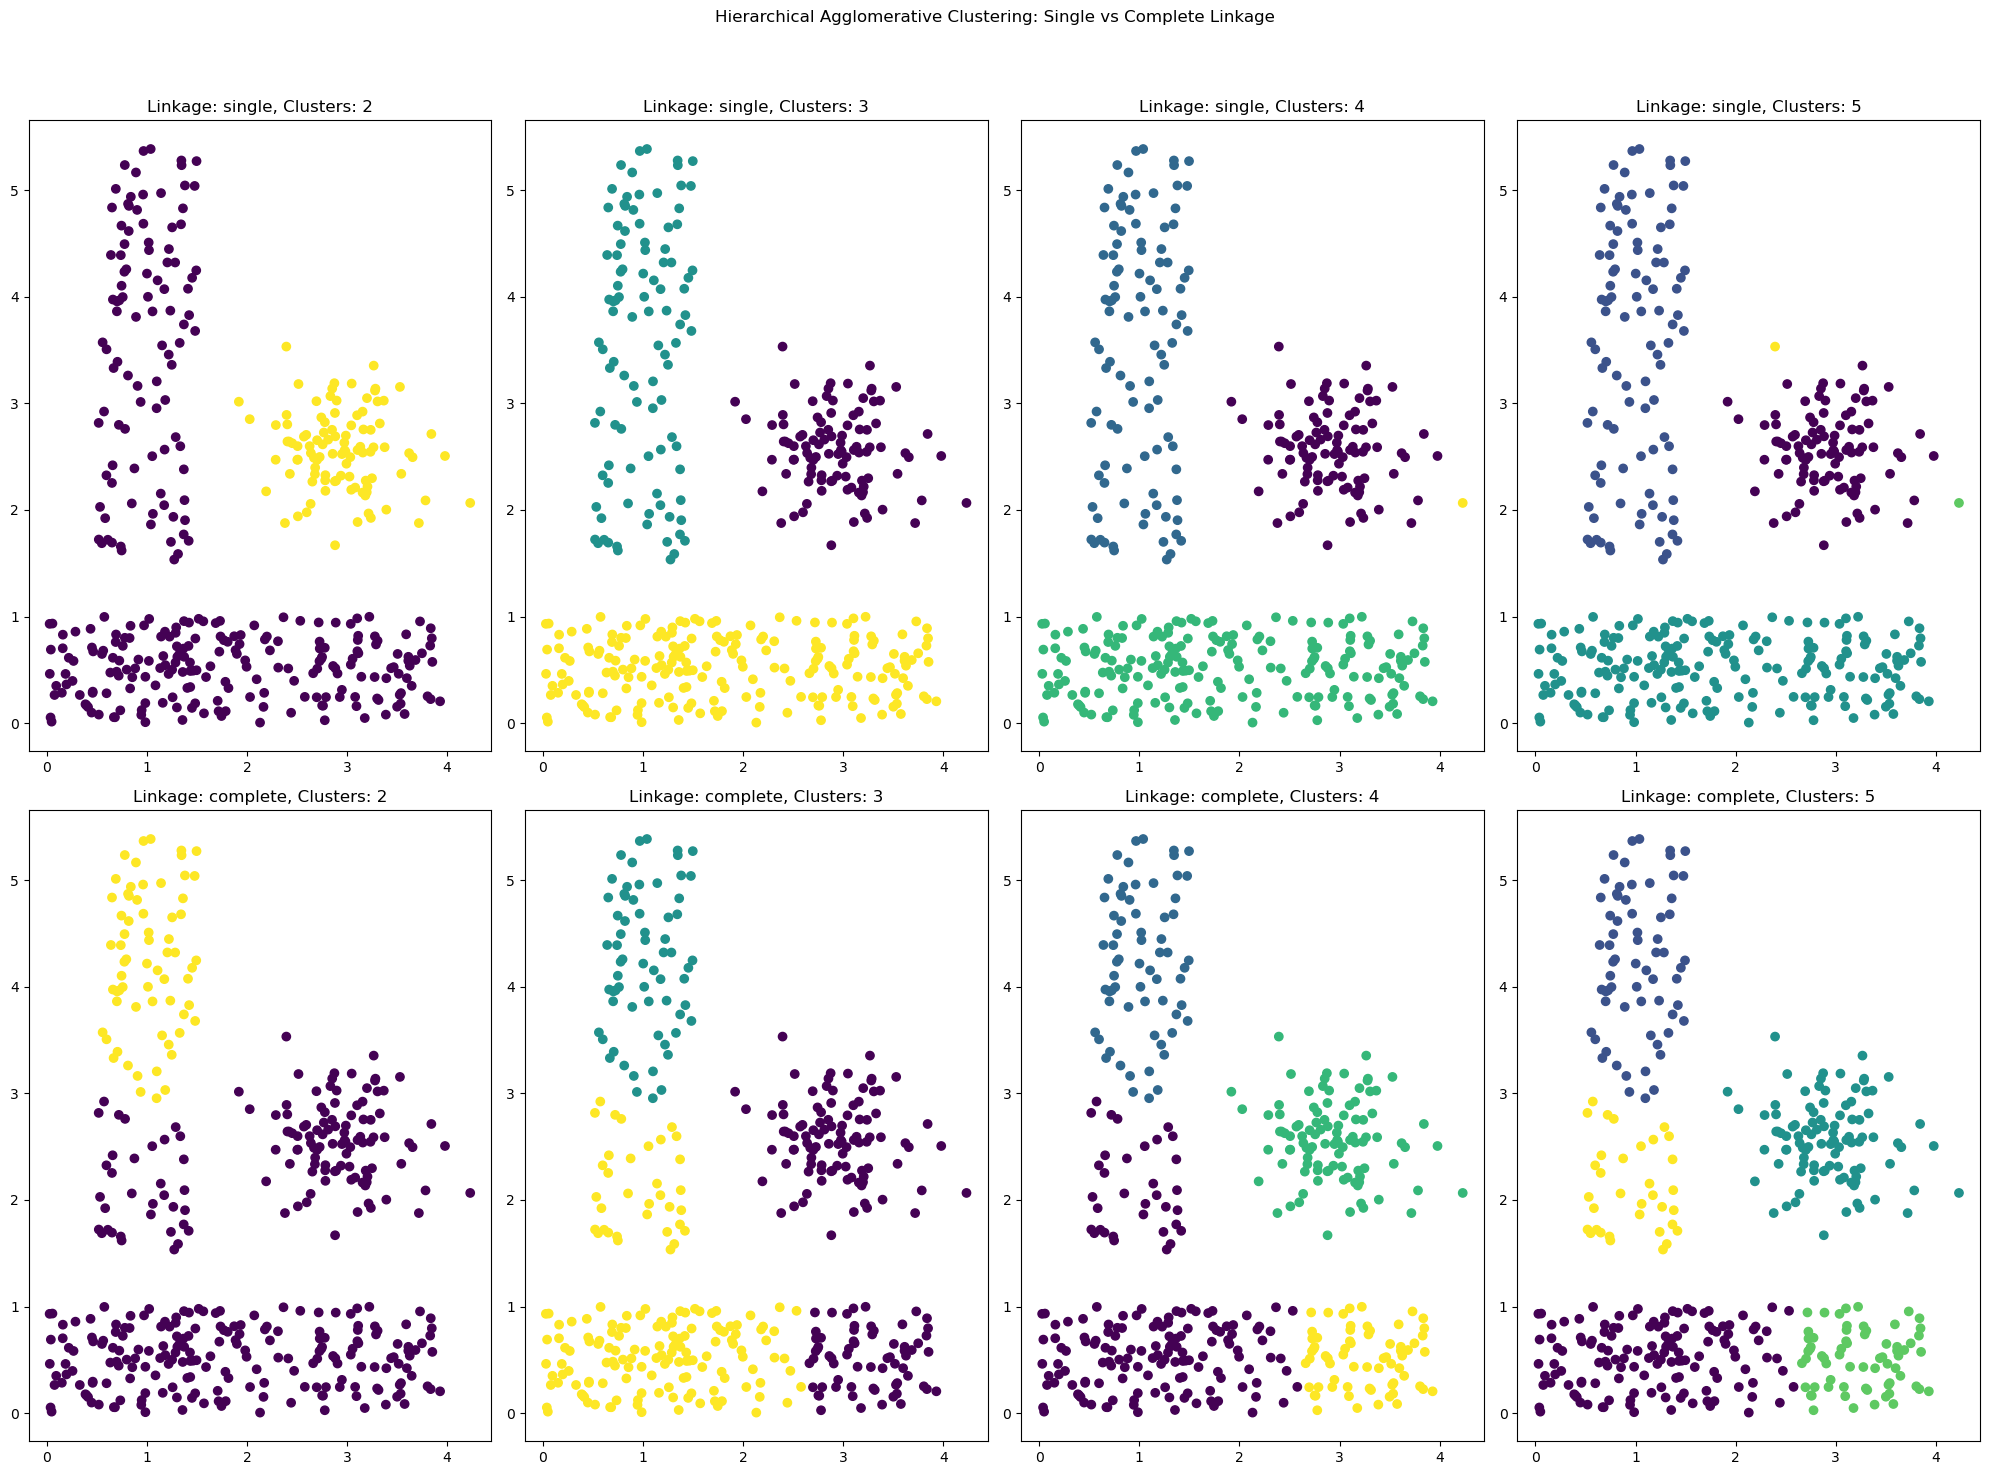

In [77]:
# Insert below the code to test Hierarchical Agglomerative Clustering on the datasets
# Single Linkage
from sklearn.cluster import AgglomerativeClustering

data = data_lsun

linkages = ['single', 'complete']
n_clusters_list = [2, 3, 4, 5]

fig, axes = plt.subplots(len(linkages), len(n_clusters_list), figsize=(20, 15))

for i, linkage in enumerate(linkages):
    for j, n_clusters in enumerate(n_clusters_list):
        hac = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        y_pred_hc = hac.fit_predict(data)
        
        ax = axes[i, j]
        ax.scatter(data[:, 0], data[:, 1], c=y_pred_hc)
        ax.set_title(f'Linkage: {linkage}, Clusters: {n_clusters}')

plt.suptitle('Hierarchical Agglomerative Clustering: Single vs Complete Linkage')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



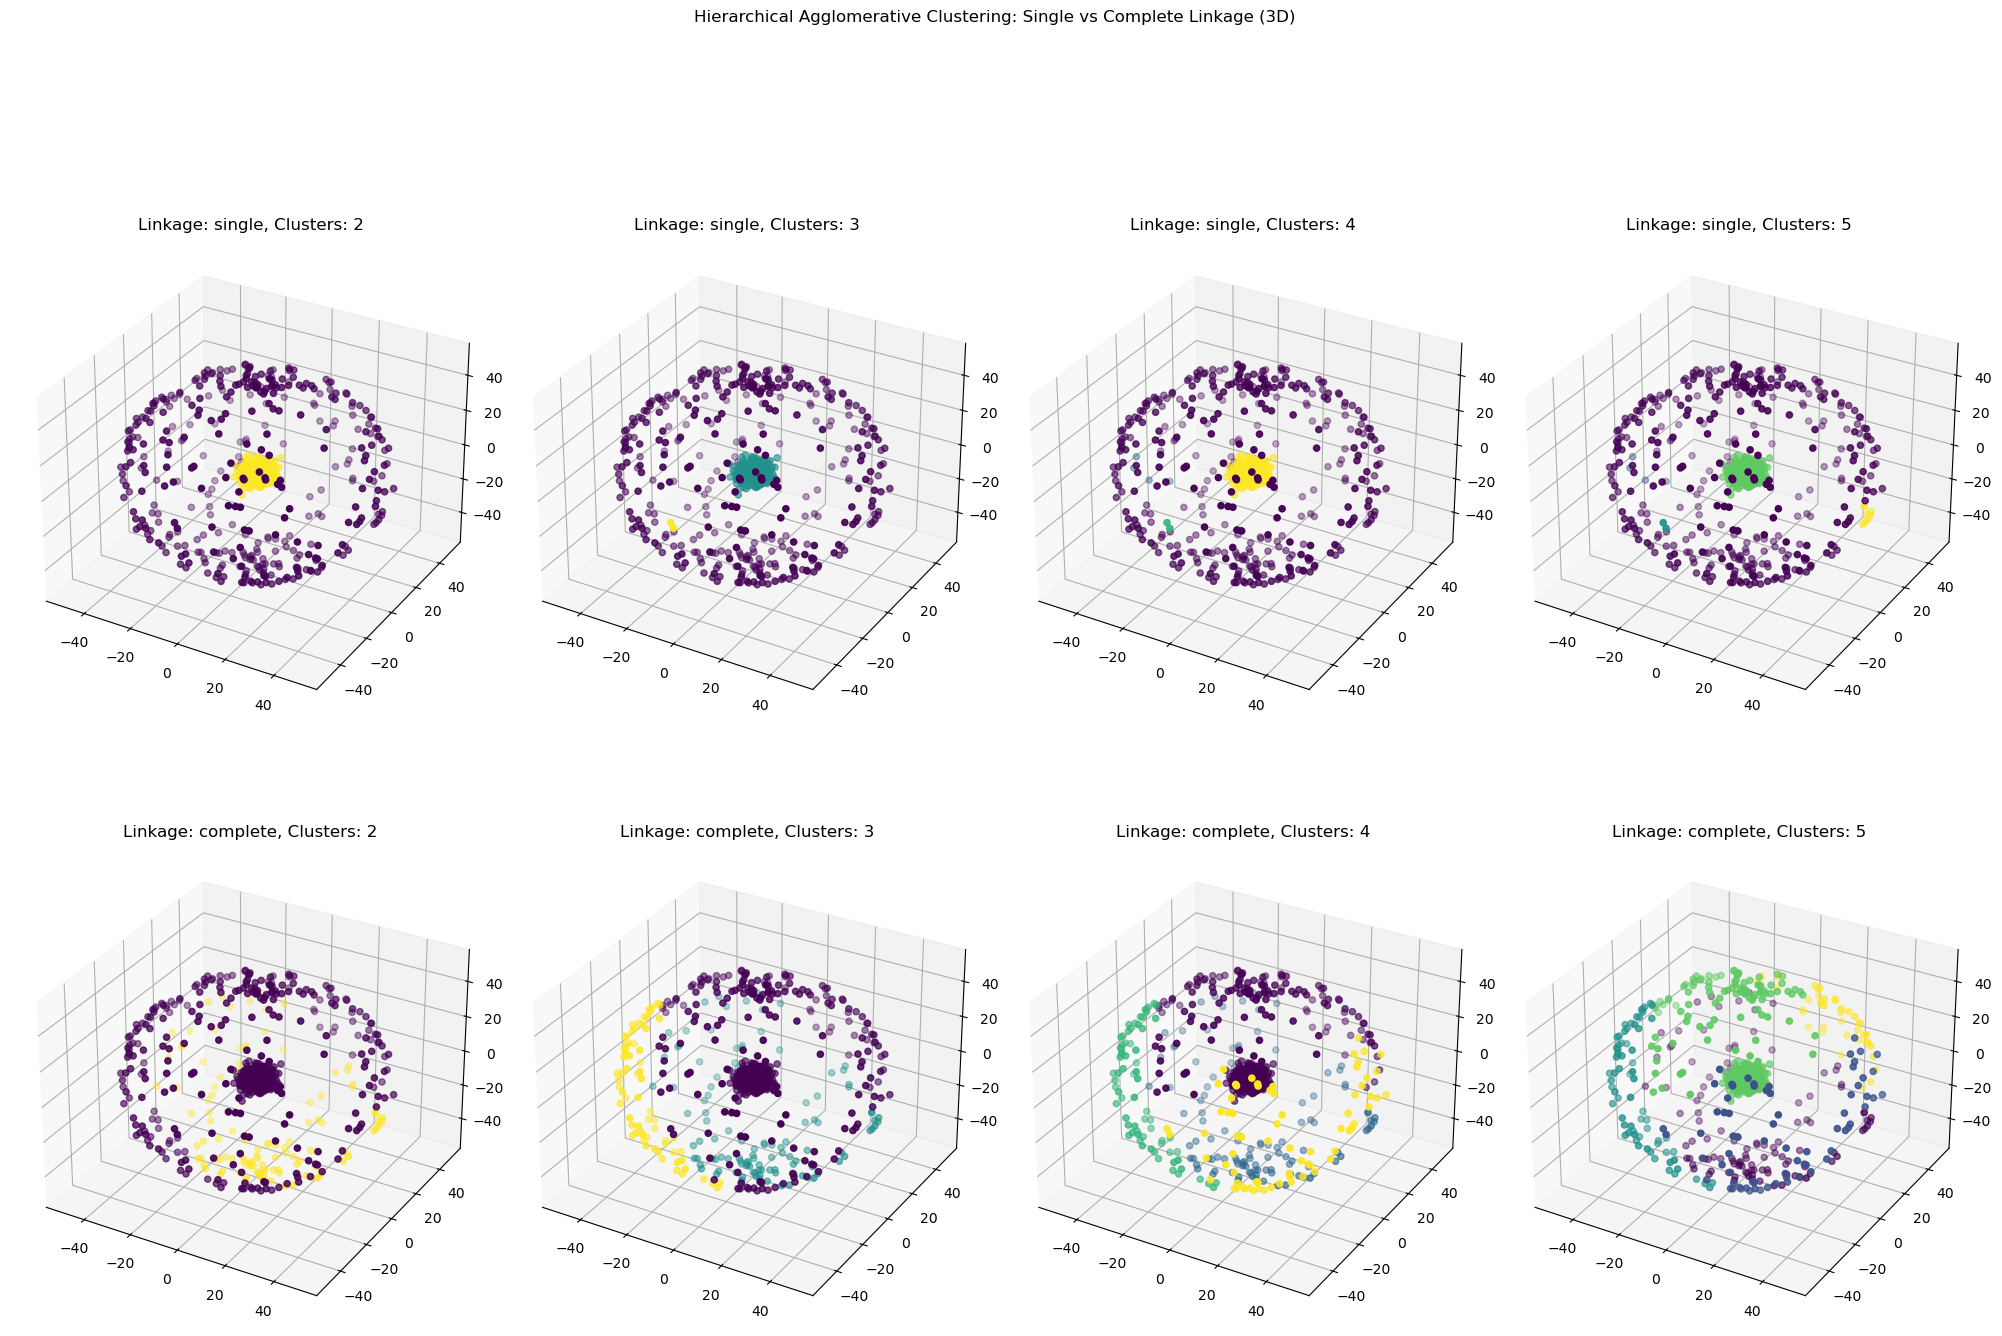

In [79]:
data = data_atom 

linkages = ['single', 'complete']
n_clusters_list = [2, 3, 4, 5]

fig = plt.figure(figsize=(20, 15))

for i, linkage in enumerate(linkages):
    for j, n_clusters in enumerate(n_clusters_list):
        hac = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        y_pred_hc = hac.fit_predict(data)
        
        ax = fig.add_subplot(len(linkages), len(n_clusters_list), i * len(n_clusters_list) + j + 1, projection='3d')
        ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=y_pred_hc)
        ax.set_title(f'Linkage: {linkage}, Clusters: {n_clusters}')

plt.suptitle('Hierarchical Agglomerative Clustering: Single vs Complete Linkage (3D)')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


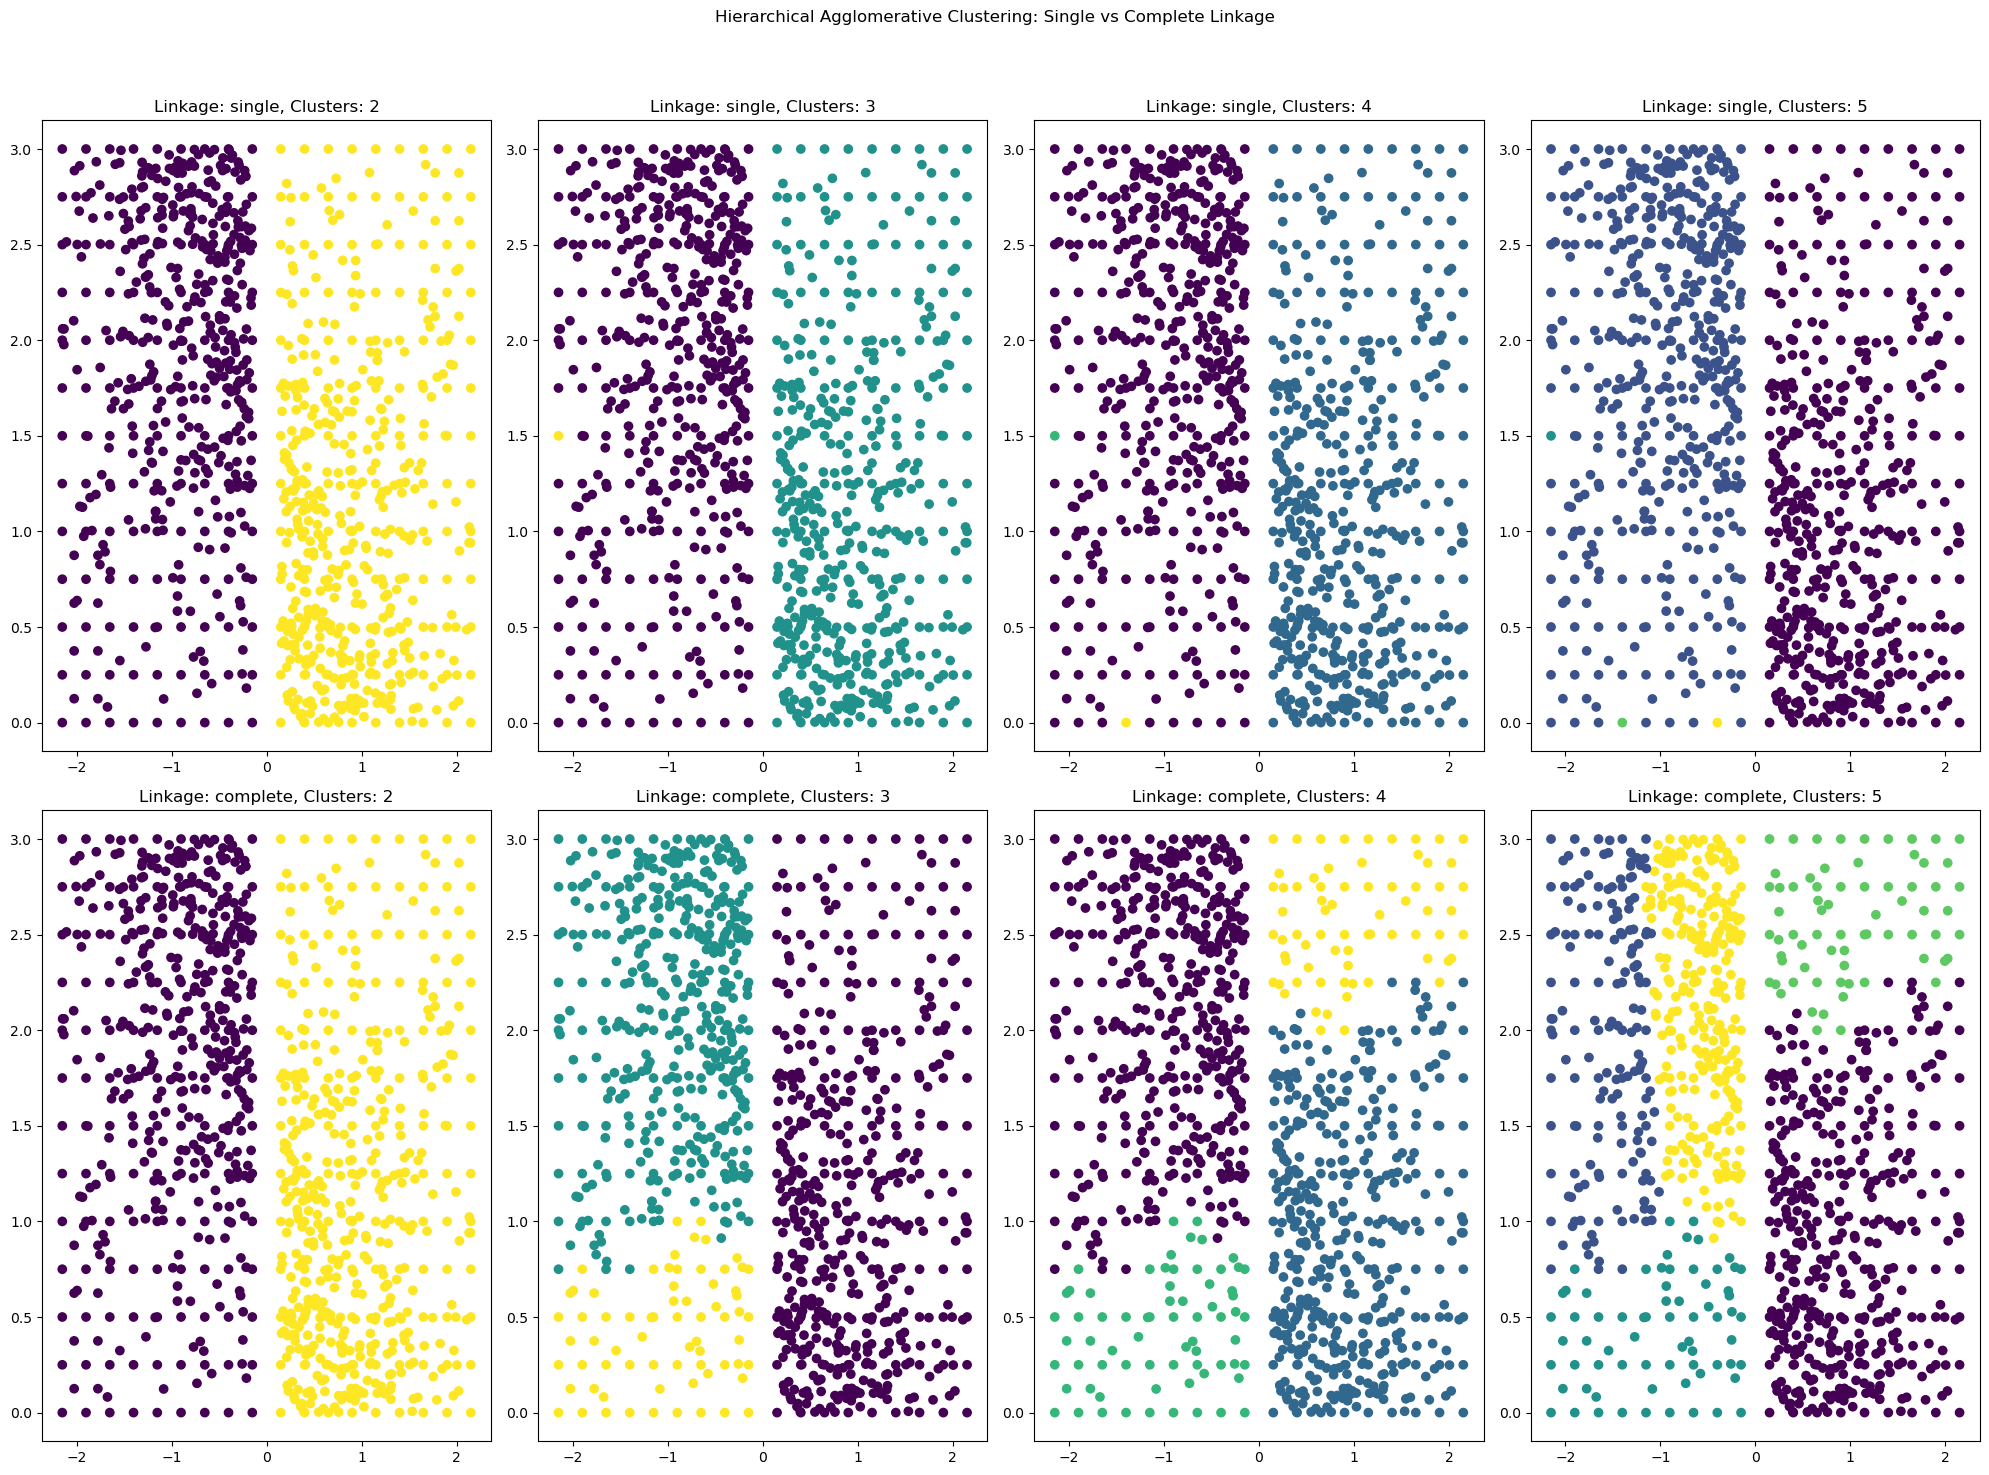

In [80]:
data = data_wingnut

linkages = ['single', 'complete']
n_clusters_list = [2, 3, 4, 5]

fig, axes = plt.subplots(len(linkages), len(n_clusters_list), figsize=(20, 15))

for i, linkage in enumerate(linkages):
    for j, n_clusters in enumerate(n_clusters_list):
        hac = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        y_pred_hc = hac.fit_predict(data)
        
        ax = axes[i, j]
        ax.scatter(data[:, 0], data[:, 1], c=y_pred_hc)
        ax.set_title(f'Linkage: {linkage}, Clusters: {n_clusters}')

plt.suptitle('Hierarchical Agglomerative Clustering: Single vs Complete Linkage')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

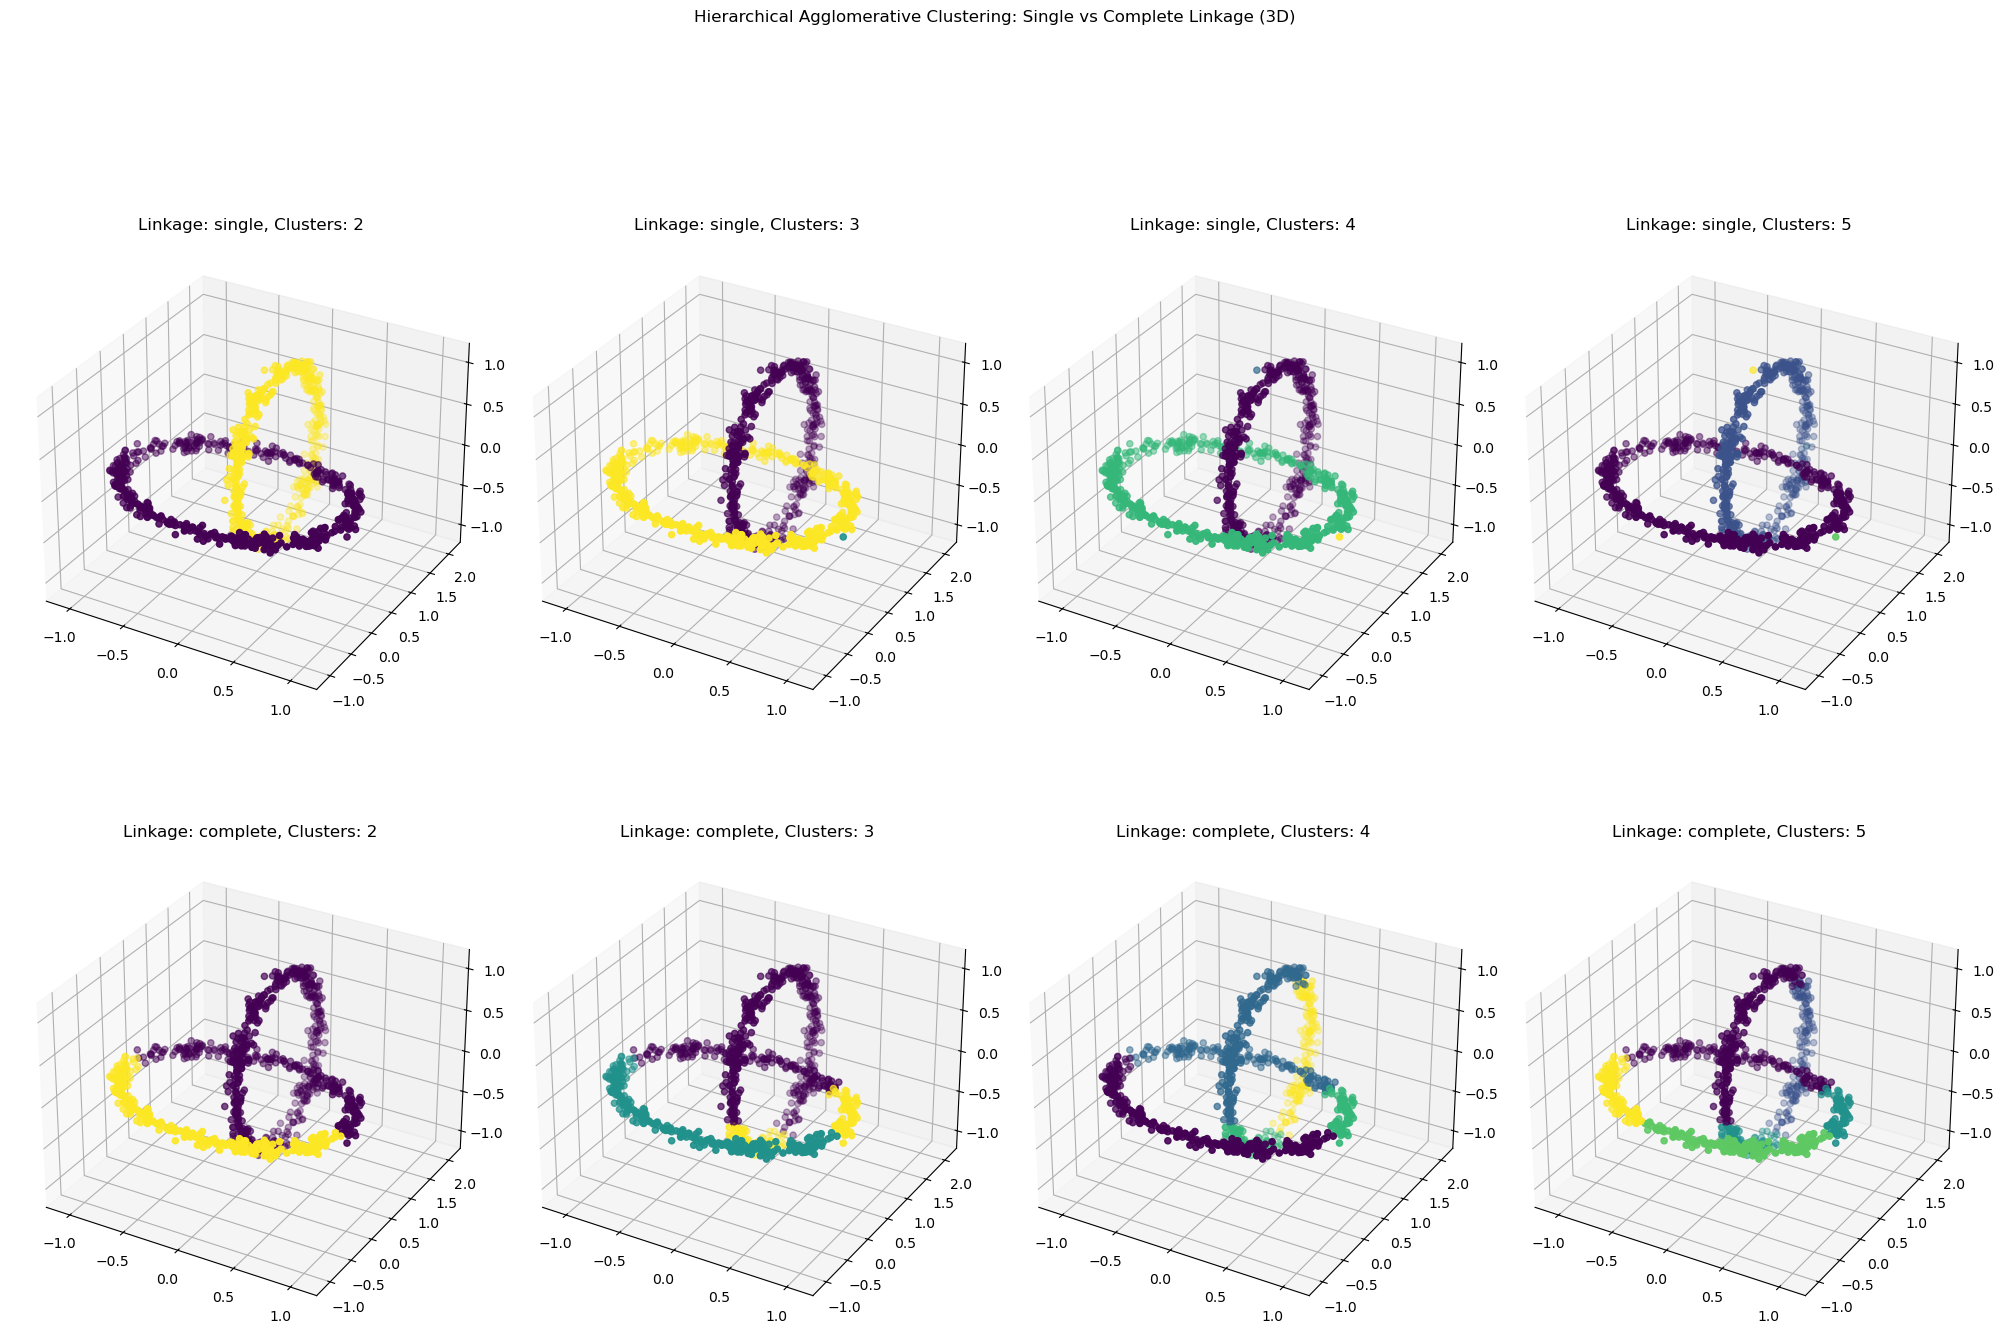

In [82]:
data = data_chainlink 

linkages = ['single', 'complete']
n_clusters_list = [2, 3, 4, 5]

fig = plt.figure(figsize=(20, 15))

for i, linkage in enumerate(linkages):
    for j, n_clusters in enumerate(n_clusters_list):
        hac = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        y_pred_hc = hac.fit_predict(data)
        
        ax = fig.add_subplot(len(linkages), len(n_clusters_list), i * len(n_clusters_list) + j + 1, projection='3d')
        ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=y_pred_hc)
        ax.set_title(f'Linkage: {linkage}, Clusters: {n_clusters}')

plt.suptitle('Hierarchical Agglomerative Clustering: Single vs Complete Linkage (3D)')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


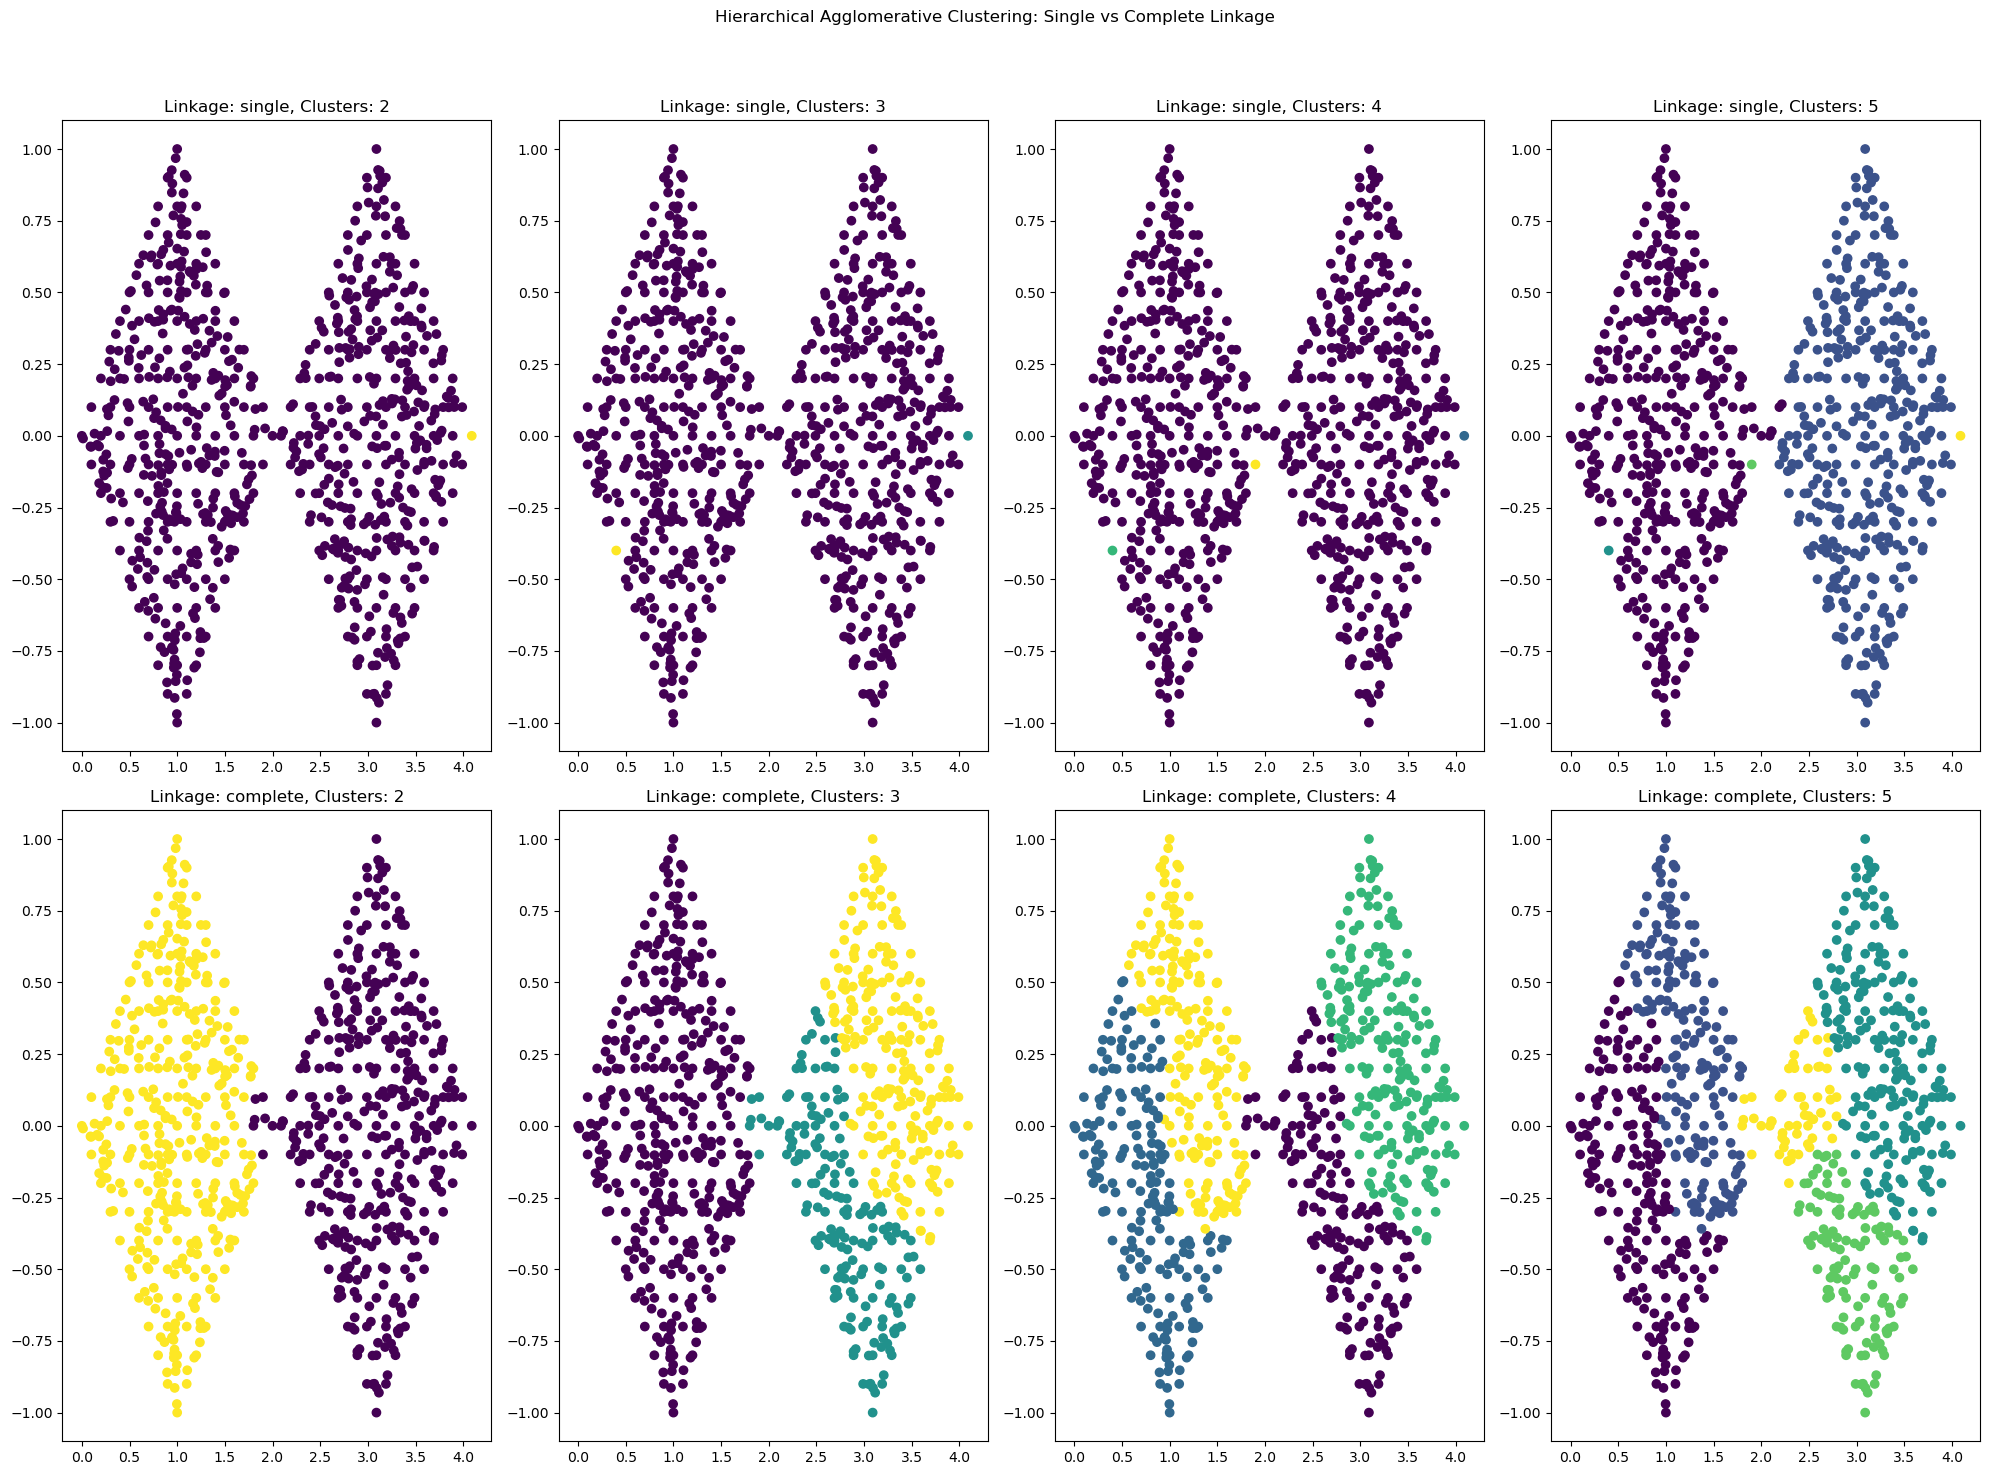

In [81]:
data = data_twodiamonds

linkages = ['single', 'complete']
n_clusters_list = [2, 3, 4, 5]

fig, axes = plt.subplots(len(linkages), len(n_clusters_list), figsize=(20, 15))

for i, linkage in enumerate(linkages):
    for j, n_clusters in enumerate(n_clusters_list):
        hac = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        y_pred_hc = hac.fit_predict(data)
        
        ax = axes[i, j]
        ax.scatter(data[:, 0], data[:, 1], c=y_pred_hc)
        ax.set_title(f'Linkage: {linkage}, Clusters: {n_clusters}')

plt.suptitle('Hierarchical Agglomerative Clustering: Single vs Complete Linkage')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### QUESTION 3: On which dataset does "single-linkage" HAC produce an excellent result? Why is it logical?

"single-linkage" HAC produces an excellent result on lsun, atom and chainlink datasets because on these datasets the clusters are well separated.

#### QUESTION 4: Conversely, on which dataset does "single-linkage" HAC perform very BADLY, and why is it expected?

"single-linkage" HAC performs very badly on wingnut and twodiamond datasets because on these datasets because the visible clusters are "linked".

#### QUESTION 5: By comparing with what you had observed for K-means, which variant of HAC (between single-linkage and complete-linkage) seems to be the most complementary to K-means?


## 3. Density-based Clustering DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm working in 2 steps:
- All examples that are sufficiently close one to another are connected
- Examples that have a minimal number of connected neighbors are considered as *core samples*, from which the clusters are built by extension (**all examples sufficiently close to a *core sample* are assigned to the same cluster as the core sample**. 

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

**Experiment DBSCAN below on the 5 datasets
 (note that you mays need to adapt eps depending on dataset)**

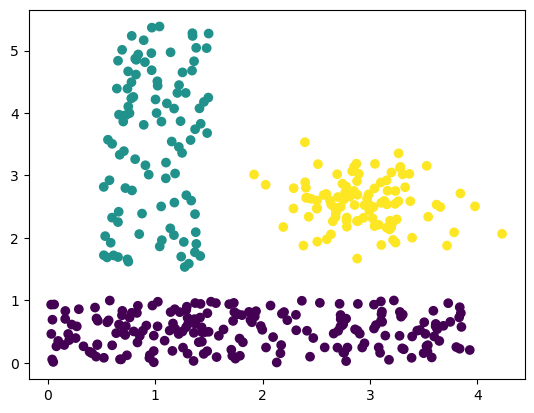

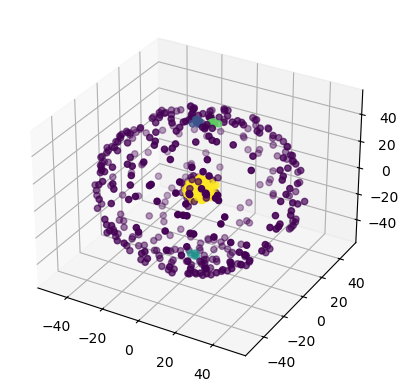

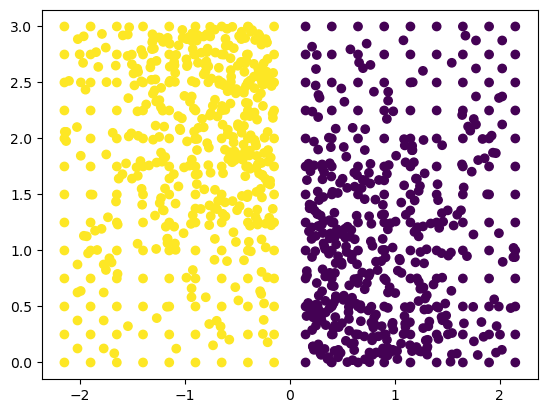

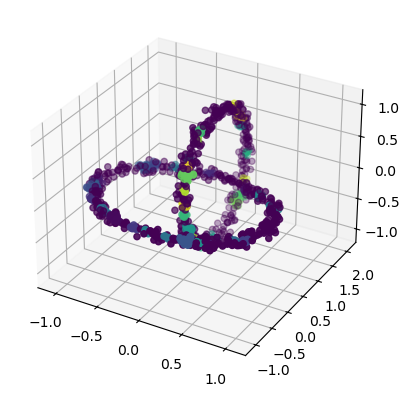

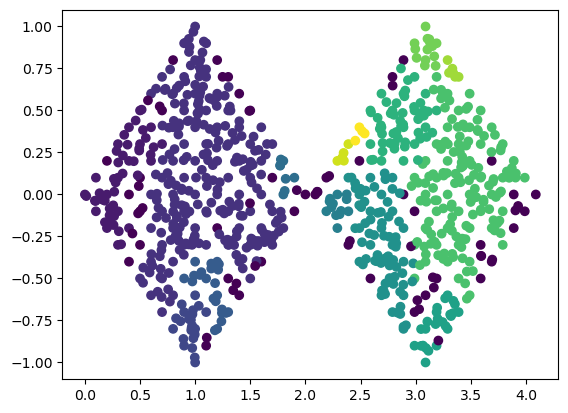

In [83]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
lsun_dbscan = dbscan.fit(data_lsun)
y_pred = lsun_dbscan.fit_predict(data_lsun)
fig = plt.figure()
plt.scatter(data_lsun[:, 0], data_lsun[:, 1], c=y_pred)
plt.show()

# COMPLETE THE CODE BELOW TO TEST DBSCAN ON THE 5 DATASETS

dbscan = DBSCAN(eps=2.5, min_samples=5)
atom_dbscan = dbscan.fit(data_atom)
y_pred = atom_dbscan.fit_predict(data_atom)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data_atom[:, 0], data_atom[:, 1], data_atom[:, 2], c=y_pred)
plt.show()

dbscan = DBSCAN(eps=0.25, min_samples=5)
wingnut_dbscan = dbscan.fit(data_wingnut)
y_pred = wingnut_dbscan.fit_predict(data_wingnut)
fig = plt.figure()
plt.scatter(data_wingnut[:, 0], data_wingnut[:, 1], c=y_pred)
plt.show()

dbscan = DBSCAN(eps=0.05, min_samples=5)
chainlink_dbscan = dbscan.fit(data_chainlink)
y_pred = chainlink_dbscan.fit_predict(data_chainlink)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data_chainlink[:, 0], data_chainlink[:, 1], data_chainlink[:, 2], c=y_pred)
plt.show()

dbscan = DBSCAN(eps=0.1, min_samples=5)
twodiamonds_dbscan = dbscan.fit(data_twodiamonds)
y_pred = twodiamonds_dbscan.fit_predict(data_twodiamonds)
fig = plt.figure()
plt.scatter(data_twodiamonds[:, 0], data_twodiamonds[:, 1], c=y_pred)
plt.show()


### To learn more about OTHER clustering methods (such as Spectral Clustering) implemented in SciKit-Learn, you can look at the following page: https://scikit-learn.org/stable/modules/clustering.html

## 4. Now experiment clustering on a more realistics dataset: the Digits Dataset https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html

In [16]:
#Load the digits dataset
digits = datasets.load_digits()

### The goal is to check if the 10 classes correspond or not to separate clusters in input space
**Therefore, you should perform clustering, with 10 or more clusters (as one class could correspond to more than one cluster), on the dataset WITHOUT USING LABELS**
**Then, you should analyze the distribution of labels of examples in each of the obtained clusters, in order to measure how homogeneous in terms of labels is each cluster, and check if it is possible to obtain a one-to-one (or one-to-few) correspondance between classes and clusters.**

c:\Users\arman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(50.722222222222214, 0.5, 'Digit')

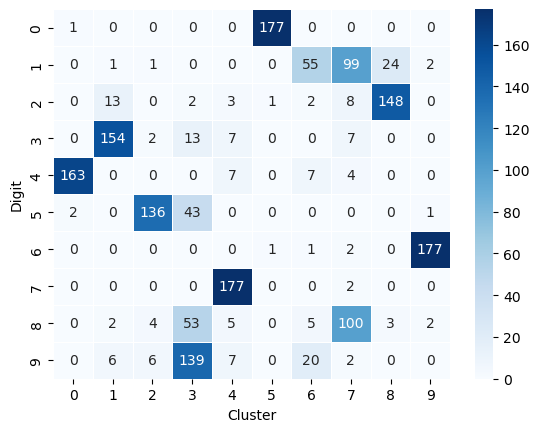

In [101]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
X = digits.data
y = digits.target

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)

clusters = kmeans.labels_
contingency_matrix = confusion_matrix(y, clusters)
sns.heatmap(contingency_matrix, annot=True, cmap="Blues", fmt="d", cbar=True, linewidths=.5)
plt.xlabel('Cluster')
plt.ylabel('Digit')